### Vishal Sharma

# Robot Navigation in a Maze Using DFS (with Python Code)
This project demonstrates how to design a robot navigation strategy for a simple maze using the Depth-First Search (DFS) algorithm, as explained in the provided PDF. The workflow includes representing the maze, implementing the DFS algorithm, reconstructing the path, and executing the solution.

### 1. Importing Required Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### 2. Maze Representation
We'll define a simple 5x5 maze for demonstration. The maze is represented as a 2D list where 0 denotes open paths and 1 denotes walls or obstacles.

In [2]:
maze = [
    [0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0],
    [0, 1, 1, 1, 0],
    [0, 1, 0, 0, 0],
    [0, 0, 0, 1, 0]
]

start = (0, 0)  # Top-left corner
goal = (4, 4)   # Bottom-right corner


### 3. Helper Function to Get Neighbors
The function below finds all valid (open) neighboring cells for a given cell, considering movement in up, down, left, and right directions

In [3]:
def get_neighbors(maze, cell):
    neighbors = []
    directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]  # Up, Down, Left, Right
    rows, cols = len(maze), len(maze[0])

    for dir in directions:
        neighbor = (cell[0] + dir[0], cell[1] + dir[1])
        if 0 <= neighbor[0] < rows and 0 <= neighbor[1] < cols:
            if maze[neighbor[0]][neighbor[1]] == 0:  # Open cell
                neighbors.append(neighbor)

    return neighbors


### 4. Implementing the DFS Algorithm
Here is a Python implementation of the DFS-based maze navigation strategy:

In [4]:
def dfs(maze, start, goal):
    stack = [start]
    visited = set()
    visited.add(start)
    parent = {start: None}

    while stack:
        current = stack.pop()
        if current == goal:
            break
        for neighbor in get_neighbors(maze, current):
            if neighbor not in visited:
                stack.append(neighbor)
                visited.add(neighbor)
                parent[neighbor] = current

    # Reconstruct path
    path = []
    step = goal
    while step is not None:
        path.append(step)
        step = parent.get(step)
    path.reverse()

    # Check if a path was found
    if path[0] != start:
        return None
    return path


### 5. Executing DFS and Outputting the Path

In [5]:
optimal_path = dfs(maze, start, goal)
if optimal_path:
    print("Optimal Path:", optimal_path)
else:
    print("No path found from start to goal!")


Optimal Path: [(0, 0), (0, 1), (1, 1), (1, 2), (1, 3), (1, 4), (2, 4), (3, 4), (4, 4)]


### 6. Visualizing the Maze and Path 

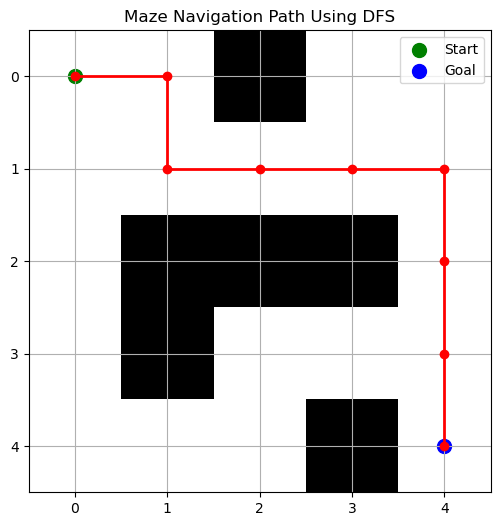

In [6]:
def visualize_maze(maze, path):
    maze_arr = np.array(maze)
    plt.figure(figsize=(6,6))
    plt.imshow(maze_arr, cmap='binary', origin='upper')

    # Plot path if one exists
    if path:
        path_coords = list(zip(*path))
        plt.plot(path_coords[1], path_coords[0], color='red', linewidth=2, marker='o')
        plt.scatter(path_coords[1][0], path_coords[0][0], color='green', s=100, label='Start')
        plt.scatter(path_coords[1][-1], path_coords[0][-1], color='blue', s=100, label='Goal')

    plt.legend()
    plt.xticks(np.arange(maze_arr.shape[1]))
    plt.yticks(np.arange(maze_arr.shape[0]))
    plt.grid(True)
    plt.title("Maze Navigation Path Using DFS")
    plt.show()

# Call visualization
visualize_maze(maze, optimal_path)


### 7. Handling No Path Found
The dfs function ensures that a result is only returned if a path exists. Otherwise, it indicates that no path could be found, handling edge cases gracefully.

### 8. Custom Maze Datasets
You can create and test with your own datasets by redefining the maze variable. For example:

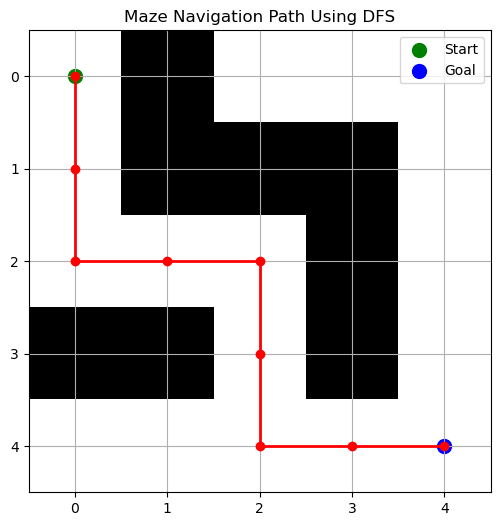

Optimal Path: [(0, 0), (1, 0), (2, 0), (2, 1), (2, 2), (3, 2), (4, 2), (4, 3), (4, 4)]


In [7]:
custom_maze = [
    [0, 1, 0, 0, 0],
    [0, 1, 1, 1, 0],
    [0, 0, 0, 1, 0],
    [1, 1, 0, 1, 0],
    [0, 0, 0, 0, 0]
]
custom_optimal_path = dfs(custom_maze, (0,0), (4,4))
visualize_maze(custom_maze, custom_optimal_path)
print("Optimal Path:", custom_optimal_path)


### 9. Conclusion
This project provides a complete Jupyter Notebook-style workflow for robot navigation in a maze using DFS, including sample datasets, Python code, and visualization. You can extend this strategy with other search methods or more complex mazes as needed